In [ ]:
import pandas as pd

splits = ["train", "test", "valid"]
BASE = "Data_non-process/Acne.v18-acne-new.multiclass"

dfs = {}
counts = {}

for split in splits:
    df = pd.read_csv(f"{BASE}/{split}/_classes.csv")
    label_cols = df.columns.drop("filename")
    df["num_labels"] = df[label_cols].sum(axis=1)

    dfs[split] = df
    counts[split] = {
        "total": len(df),
        "single": (df["num_labels"] == 1).sum(),
        "multi":  (df["num_labels"] >= 2).sum()
    }

total_images = sum(counts[s]["total"] for s in splits)
total_single = sum(counts[s]["single"] for s in splits)
total_multi  = sum(counts[s]["multi"]  for s in splits)


print(
    f"Tổng số ảnh        : "
    f"{counts['train']['total']} (train) + "
    f"{counts['test']['total']} (test) + "
    f"{counts['valid']['total']} (valid) = {total_images}"
)

print(
    f"Ảnh 1 nhãn         : "
    f"{counts['train']['single']} (train) + "
    f"{counts['test']['single']} (test) + "
    f"{counts['valid']['single']} (valid) = {total_single}"
)

print(
    f"Ảnh đa nhãn        : "
    f"{counts['train']['multi']} (train) + "
    f"{counts['test']['multi']} (test) + "
    f"{counts['valid']['multi']} (valid) = {total_multi}"
)

print("\n THỐNG KÊ ẢNH 1 NHÃN THEO TỪNG LOẠI")

label_totals = {label: 0 for label in label_cols}

for split in splits:
    df = dfs[split]
    single_df = df[df["num_labels"] == 1]

    for label in label_cols:
        label_totals[label] += (single_df[label] == 1).sum()

for label, count in label_totals.items():
    print(f"- {label:12}: {count} ảnh")


In [ ]:
import os
import shutil
import pandas as pd

LABEL_TO_DIR = {
    "blackheads": "dauden",
    "whiteheads": "dautrang",
    "dark spot": "seo",
    "nodules": "mun",
    "papules": "mun",
    "pustules": "mun"
}

splits = ["train", "valid", "test"]

BASE_SRC = "Data_non-process/Acne.v18-acne-new.multiclass"
BASE_DST = "dataprocessed"

for folder in set(LABEL_TO_DIR.values()):
    os.makedirs(os.path.join(BASE_DST, folder), exist_ok=True)

for split in splits:
    csv_path = f"{BASE_SRC}/{split}/_classes.csv"
    img_dir  = f"{BASE_SRC}/{split}"

    df = pd.read_csv(csv_path)

    label_cols = df.columns.drop("filename")

    # Tính số nhãn
    df["num_labels"] = df[label_cols].sum(axis=1)

    # Chỉ lấy ảnh 1 nhãn
    single_df = df[df["num_labels"] == 1]

    moved_count = 0

    for _, row in single_df.iterrows():
        filename = row["filename"]

        # Xác định nhãn của ảnh
        label = row[label_cols][row[label_cols] == 1].index[0]

        # Xác định thư mục đích
        target_subdir = LABEL_TO_DIR[label]
        dst_path = os.path.join(BASE_DST, target_subdir, filename)
        src_path = os.path.join(img_dir, filename)

        if os.path.exists(src_path):
            shutil.copy2(src_path, dst_path)
            moved_count += 1
        else:
            print(f"⚠️ Không tìm thấy ảnh: {src_path}")

    print(f"Đã copy {moved_count} ảnh từ tập {split}")


In [ ]:
import pandas as pd

splits = ["train", "test", "valid"]
BASE = "Data_non-process/Acne.v18-acne-new.multiclass"

dfs = {}
counts = {}

for split in splits:
    df = pd.read_csv(f"{BASE}/{split}/_classes.csv")
    label_cols = df.columns.drop("filename")
    df["num_labels"] = df[label_cols].sum(axis=1)

    dfs[split] = df
    counts[split] = {
        "total": len(df),
        "single": (df["num_labels"] == 1).sum(),
        "multi":  (df["num_labels"] >= 2).sum()
    }

total_images = sum(counts[s]["total"] for s in splits)
total_single = sum(counts[s]["single"] for s in splits)
total_multi  = sum(counts[s]["multi"]  for s in splits)


print(
    f"Tổng số ảnh        : "
    f"{counts['train']['total']} (train) + "
    f"{counts['test']['total']} (test) + "
    f"{counts['valid']['total']} (valid) = {total_images}"
)

print(
    f"Ảnh 1 nhãn         : "
    f"{counts['train']['single']} (train) + "
    f"{counts['test']['single']} (test) + "
    f"{counts['valid']['single']} (valid) = {total_single}"
)

print(
    f"Ảnh đa nhãn        : "
    f"{counts['train']['multi']} (train) + "
    f"{counts['test']['multi']} (test) + "
    f"{counts['valid']['multi']} (valid) = {total_multi}"
)

print("\n THỐNG KÊ ẢNH 1 NHÃN THEO TỪNG LOẠI")

label_totals = {label: 0 for label in label_cols}

for split in splits:
    df = dfs[split]
    single_df = df[df["num_labels"] == 1]

    for label in label_cols:
        label_totals[label] += (single_df[label] == 1).sum()

for label, count in label_totals.items():
    print(f"- {label:12}: {count} ảnh")


In [ ]:
import os
import shutil
import pandas as pd

LABEL_TO_DIR = {
    "blackheads": "dauden",
    "whiteheads": "dautrang",
    "dark spot": "seo",
    "nodules": "mun",
    "papules": "mun",
    "pustules": "mun"
}

splits = ["train", "valid", "test"]

BASE_SRC = "Data_non-process/Acne.v18-acne-new.multiclass"
BASE_DST = "dataprocessed"

for folder in set(LABEL_TO_DIR.values()):
    os.makedirs(os.path.join(BASE_DST, folder), exist_ok=True)

for split in splits:
    csv_path = f"{BASE_SRC}/{split}/_classes.csv"
    img_dir  = f"{BASE_SRC}/{split}"

    df = pd.read_csv(csv_path)

    label_cols = df.columns.drop("filename")

    # Tính số nhãn
    df["num_labels"] = df[label_cols].sum(axis=1)

    # Chỉ lấy ảnh 1 nhãn
    single_df = df[df["num_labels"] == 1]

    moved_count = 0

    for _, row in single_df.iterrows():
        filename = row["filename"]

        # Xác định nhãn của ảnh
        label = row[label_cols][row[label_cols] == 1].index[0]

        # Xác định thư mục đích
        target_subdir = LABEL_TO_DIR[label]
        dst_path = os.path.join(BASE_DST, target_subdir, filename)
        src_path = os.path.join(img_dir, filename)

        if os.path.exists(src_path):
            shutil.copy2(src_path, dst_path)
            moved_count += 1
        else:
            print(f"⚠️ Không tìm thấy ảnh: {src_path}")

    print(f"Đã copy {moved_count} ảnh từ tập {split}")


In [ ]:
import os, shutil, random
from pathlib import Path

src = Path("dataprocessed")
dst = Path("dataset")
ratios = {"train": 0.7, "val": 0.15, "test": 0.15}
random.seed(42)

if dst.exists(): shutil.rmtree(dst)

for split in ratios:
    for cls in os.listdir(src):
        (dst / split / cls).mkdir(parents=True, exist_ok=True)

for cls in os.listdir(src):
    imgs = [p for p in (src/cls).glob("*") if p.is_file() and not p.name.startswith(".")]
    random.shuffle(imgs)

    n = len(imgs)
    n_train = int(n * ratios["train"])
    n_val = int(n * ratios["val"])

    splits = {
        "train": imgs[:n_train],
        "val": imgs[n_train:n_train+n_val],
        "test": imgs[n_train+n_val:]
    }

    for split, files in splits.items():
        for f in files:
            shutil.copy2(f, dst / split / cls / f.name)

print("Split done:", dst.resolve())


Split done: /Users/phamhuyhung/HuyHung/CaoHoc/SinhTinHoc/Deadline_ThayBao/dataset


In [ ]:
from torchvision import transforms

train_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])

val_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])


In [165]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_ds = ImageFolder("dataset/train", transform=train_tf)
val_ds   = ImageFolder("dataset/val", transform=val_tf)
test_ds  = ImageFolder("dataset/test", transform=val_tf)

batch_size = 32
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

class_names = train_ds.classes
print("Classes:", class_names, "| num_classes:", len(class_names))


Classes: ['dauden', 'dautrang', 'mun', 'seo'] | num_classes: 4


In [166]:
import torch.nn as nn

class SimpleSkinCNN(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()

        def block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),

                nn.Conv2d(out_ch, out_ch, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),

                nn.MaxPool2d(2)
            )

        self.features = nn.Sequential(
            block(3, 32),      # 224 -> 112
            block(32, 64),     # 112 -> 56
            block(64, 128),    # 56 -> 28
            block(128, 256),   # 28 -> 14
            block(256, 512),   # 14 -> 7
        )

        self.gap = nn.AdaptiveAvgPool2d(1)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.gap(x)
        x = self.classifier(x)
        return x


In [ ]:
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

model = SimpleSkinCNN(num_classes=4).to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

num_epochs = 50
best_val_acc = 0.0
best_path = "cnn_best.pt"

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = total = 0

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = out.argmax(1)
        correct += (pred == y).sum().item()
        total += y.size(0)

    train_loss = running_loss / len(train_loader)   # avg train loss
    train_acc = correct / total

    # ---- val ----
    model.eval()
    correct = total = 0
    val_loss_sum = 0.0

    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = criterion(out, y)
            val_loss_sum += loss.item()

            pred = out.argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    val_loss = val_loss_sum / len(val_loader)       # ✅ avg val loss
    val_acc = correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), best_path)
        tag = "=> BEST"
    else:
        tag = ""

    print(f"Epoch {epoch+1:02d} | "
          f"Train loss={train_loss:.4f}, acc={train_acc:.3f} | "
          f"Val loss={val_loss:.4f}, acc={val_acc:.3f} {tag}")


Epoch 01 | Train loss=1.1998, acc=0.429 | Val loss=2.0831, acc=0.421 => BEST
Epoch 02 | Train loss=1.0606, acc=0.480 | Val loss=0.9971, acc=0.521 => BEST
Epoch 03 | Train loss=1.0635, acc=0.512 | Val loss=0.8907, acc=0.579 => BEST
Epoch 04 | Train loss=1.0198, acc=0.571 | Val loss=0.8705, acc=0.564 
Epoch 05 | Train loss=1.0003, acc=0.568 | Val loss=0.8274, acc=0.629 => BEST
Epoch 06 | Train loss=0.9944, acc=0.586 | Val loss=0.8127, acc=0.693 => BEST
Epoch 07 | Train loss=0.9908, acc=0.597 | Val loss=0.8618, acc=0.571 
Epoch 08 | Train loss=0.9774, acc=0.574 | Val loss=1.8583, acc=0.407 
Epoch 09 | Train loss=0.9907, acc=0.603 | Val loss=0.9045, acc=0.707 => BEST
Epoch 10 | Train loss=0.9381, acc=0.640 | Val loss=0.7292, acc=0.707 
Epoch 11 | Train loss=0.9140, acc=0.665 | Val loss=0.7936, acc=0.643 
Epoch 12 | Train loss=0.9576, acc=0.613 | Val loss=1.4416, acc=0.543 
Epoch 13 | Train loss=0.8935, acc=0.684 | Val loss=1.5841, acc=0.507 
Epoch 14 | Train loss=0.8658, acc=0.684 | Val lo

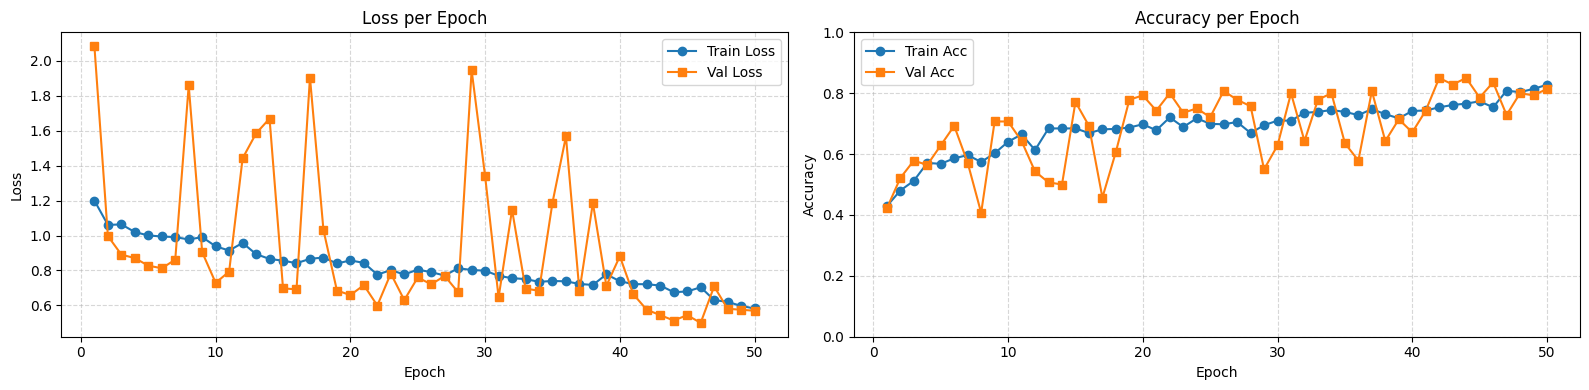

In [168]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker="o", label="Train Loss")
plt.plot(epochs, val_losses, marker="s", label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, marker="o", label="Train Acc")
plt.plot(epochs, val_accs, marker="s", label="Val Acc")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


In [169]:
import numpy as np
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()

y_true, y_pred = [], []

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        out = model(x)
        preds = out.argmax(1).cpu().numpy()

        y_pred.extend(preds)
        y_true.extend(y.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Accuracy
acc = (y_true == y_pred).mean()
print(f"Test Accuracy: {acc:.4f}")

# Precision / Recall / F1
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))


Test Accuracy: 0.7877

Classification Report:
              precision    recall  f1-score   support

      dauden     0.9000    0.5625    0.6923        32
    dautrang     0.6207    0.9474    0.7500        38
         mun     0.9032    0.7000    0.7887        40
         seo     0.8919    0.9167    0.9041        36

    accuracy                         0.7877       146
   macro avg     0.8290    0.7816    0.7838       146
weighted avg     0.8262    0.7877    0.7860       146



In [170]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             864
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,216
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,432
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,864
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

Test accuracy: 0.7876712328767124


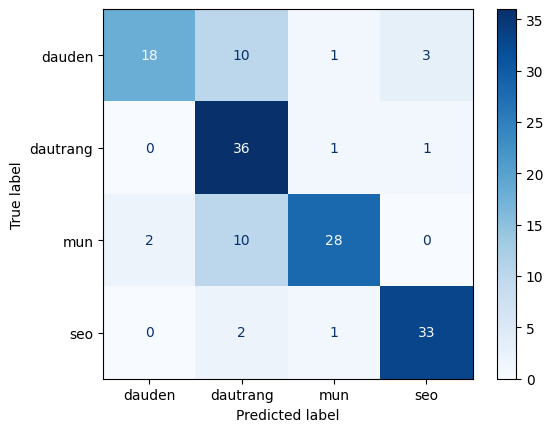

In [177]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true, y_pred = [], []

model.eval()
with torch.no_grad():
    for x,y in test_loader:
        x = x.to(device)
        out = model(x)
        y_pred += out.argmax(1).cpu().tolist()
        y_true += y.tolist()

acc = np.mean(np.array(y_pred)==np.array(y_true))
print("Test accuracy:", acc)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.show()


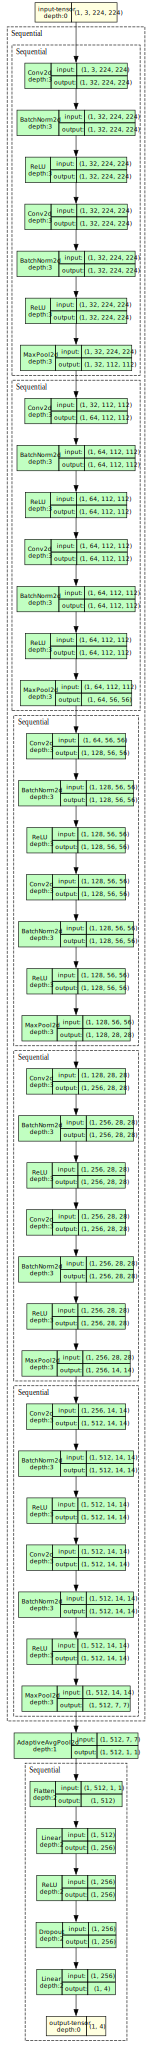

In [ ]:
from torchview import draw_graph
import torch

model_cpu = model.cpu()  # cho dễ vẽ
graph = draw_graph(
    model_cpu,
    input_size=(1, 3, 224, 224),
    expand_nested=True,
    graph_name="SimpleSkinCNN",
    save_graph=True,
    filename="SimpleSkinCNN",
    directory="."
)
graph.visual_graph
